今回のレポートでは、①オートエンコーダの作成、②再帰型ニューラルネットワークの作成を試みた。

①コブダクラス型生産関数を再現できるオートエンコーダの作成が目標である。

In [15]:
%matplotlib inline

import numpy as np
import pylab as pl
import math 
from sympy import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [16]:
from nn import NN

定義域は0≤x≤1である。

<P>コブ・ダグラス型生産関数は以下の通りである。</P>
<P>z = x_1**0.5*x_2*0.5</P>

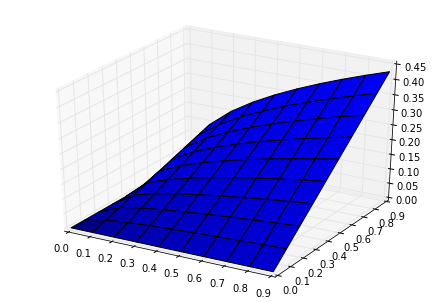

In [17]:
def example1(x_1, x_2):
    z = x_1**0.5*x_2*0.5
    return z

fig = pl.figure()
ax = Axes3D(fig)

X = np.arange(0, 1, 0.1)
Y = np.arange(0, 1, 0.1)

X, Y = np.meshgrid(X, Y)
Z = example1(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1)

pl.show()

NNのクラスはすでにNN.pyからimportしてある。

In [19]:
nn = NN()

以下に使い方を説明する。

初めに、このコブ・ダグラス型生産関数を用いる。

In [20]:
x_1 = Symbol('x_1')
x_2 = Symbol('x_2')
f = x_1**0.5*x_2*0.5

入力層、中間層、出力層を作る関数を実行する。引数には層の数を用いる。

In [21]:
nn.set_input_layer(2)

array([ 0.,  0.])

In [22]:
nn.set_hidden_layer(2)

(array([ 0.,  0.]), array([ 0.,  0.]))

In [23]:
nn.set_output_layer(2)

(array([ 0.,  0.]), array([ 0.,  0.]), array([ 0.,  0.]))

<p>nn.set_hidden_layer()は同時にシグモイド関数で変換する前の中間層も作る。</p>
<p>set_output_layer()は同時にシグモイド関数で変換する前の出力層、さらに教師データを入れる配列も作る。</p>

nn.setup()で入力層ー中間層、中間層ー出力層間の重みを入れる配列を作成する。

nn.initialize()で重みを初期化する。重みは-1/√d ≤ w ≤ 1/√d (dは入力層及び中間層の数)の範囲で一様分布から決定される。

In [24]:
nn.setup()
nn.initialize()

nn.supervised_function(f, idata)は教師データを作成する。引数は関数とサンプルデータをとる。

In [25]:
idata = [1, 2]

In [26]:
nn.supervised_function(f, idata)

nn.simulate(N, eta)は引数に更新回数と学習率をとる。普通はN=1で行うべきかもしれないが、工夫として作成してみた。N回学習した後に出力層を返す。

In [27]:
nn.simulate(1, 0.1)

array([ 0.35573033,  0.46501136])

nn.calculation()は学習せずに入力層から出力層の計算を行う。nn.simulate()内にも用いられている。

次に実際に学習を行う。サンプルデータは、

In [28]:
X = np.arange(0, 1, 0.2)
Y = np.arange(0, 1, 0.2)
print X, Y

[ 0.   0.2  0.4  0.6  0.8] [ 0.   0.2  0.4  0.6  0.8]


の組み合わせである。

In [29]:
X = np.arange(0, 1, 0.2)
Y = np.arange(0, 1, 0.2)

a = np.array([])
b = np.array([])
c = np.array([])

nn = NN()
nn.set_network()

for x in X:
    for y in Y:
        a = np.append(a, x)
        b = np.append(b, y)
        
for i in range(100):
        l = np.random.choice([i for i in range(len(a))])
        m = nn.main2(1, f, [a[l], b[l]], 0.5)

for x in X:
    for y in Y:
        idata = [x, y]
        c = np.append(c, nn.realize(f, idata))

In [30]:
a

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0.2,  0.2,  0.2,  0.2,  0.4,
        0.4,  0.4,  0.4,  0.4,  0.6,  0.6,  0.6,  0.6,  0.6,  0.8,  0.8,
        0.8,  0.8,  0.8])

In [31]:
b

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  0. ,  0.2,  0.4,  0.6,  0.8,  0. ,
        0.2,  0.4,  0.6,  0.8,  0. ,  0.2,  0.4,  0.6,  0.8,  0. ,  0.2,
        0.4,  0.6,  0.8])

In [32]:
c

array([ 0.33477702,  0.33324062,  0.33171718,  0.33021575,  0.32874465,
        0.32133959,  0.3198509 ,  0.31838581,  0.3169523 ,  0.3155574 ,
        0.3083959 ,  0.3069744 ,  0.30558559,  0.30423612,  0.30293148,
        0.29613312,  0.29479445,  0.29349569,  0.29224199,  0.29103729,
        0.28469555,  0.28345097,  0.28225153,  0.28110086,  0.28000137])

例えば(0, 0)を入力すると0.52328635を返している（つまりa[0]とb[0]を入力して、c[0]の値を返している）。

ここでは交差検定は用いていない。

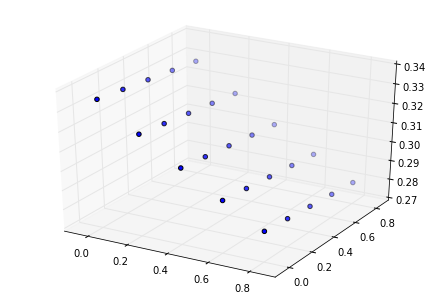

In [33]:
fig = pl.figure()
ax = Axes3D(fig)

ax.scatter(a, b, c)

pl.show()

確率的勾配降下法を100回繰り返したが見た感じから近づいている。回数を10000回に増やしてみる。

In [38]:
X = np.arange(0, 1, 0.2)
Y = np.arange(0, 1, 0.2)

a = np.array([])
b = np.array([])
c = np.array([])

nn = NN()
nn.set_network()

for x in X:
    for y in Y:
        a = np.append(a, x)
        b = np.append(b, y)
        
for i in range(10000):
        l = np.random.choice([i for i in range(len(a))])
        m = nn.main2(1, f, [a[l], b[l]], 0.5)

for x in X:
    for y in Y:
        idata = [x, y]
        c = np.append(c, nn.realize(f, idata))

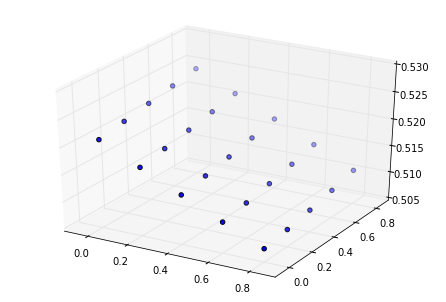

In [39]:
fig = pl.figure()
ax = Axes3D(fig)

ax.scatter(a, b, c)

pl.show()

見た感じ随分近づいているように見える。

最後に交差検定を行う。

初めに学習回数が極めて少ないNNである。

In [178]:
X = np.arange(0, 1, 0.2)
Y = np.arange(0, 1, 0.2)

a = np.array([])
b = np.array([])
c = np.array([])

for x in X:
    for y in Y:
        a = np.append(a, x)
        b = np.append(b, y)

evl = np.array([])

for i in range(len(a)):
    nn = NN()
    nn.set_network()
    for j in range(1):
        l = np.random.choice([i for i in range(len(a))])
        if l != i:
            nn.main2(1, f, [a[l], b[l]], 0.5)
    idata = [a[i], b[i]]
    est = nn.realize(f, idata)
    evl = np.append(evl, math.fabs(est - nn.supervised_data))

In [179]:
np.average(evl)

0.17409222324854595

次に十分大きく(100回に)してみる。

In [201]:
X = np.arange(0, 1, 0.2)
Y = np.arange(0, 1, 0.2)

a = np.array([])
b = np.array([])
c = np.array([])

nn = NN()
nn.set_network(h=7)

for x in X:
    for y in Y:
        a = np.append(a, x)
        b = np.append(b, y)

evl = np.array([])

for i in range(len(a)):
    nn = NN()
    nn.set_network()
    for j in range(100):
        l = np.random.choice([i for i in range(len(a))])
        if l != i:
            nn.main2(1, f, [a[l], b[l]], 0.5)
    idata = [a[i], b[i]]
    evl = np.append(evl, math.fabs(nn.realize(f, idata) - nn.supervised_data))

In [202]:
np.average(evl)

0.14482670064026229

誤差の平均であるので小さい方よい。
学習回数を増やした結果、精度が上がった。

最後にオートエンコーダを作成する。回数を増やした方がよいことが分かったため、10000回学習させてみる。

In [203]:
nn = NN()
nn.set_network()

In [204]:
X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)

a = np.array([])
b = np.array([])
c = np.array([])

for x in X:
    for y in Y:
        a = np.append(a, x)
        b = np.append(b, y)

evl = np.array([])

s = [i for i in range(len(a))]

for j in range(1000):
    l = np.random.choice(s)
    nn.main2(1, f, [a[l], b[l]], 0.5)

In [176]:
c = np.array([])

for i in range(len(a)):
    idata = [a[i], b[i]]
    c = np.append(c, nn.realize(f, idata))

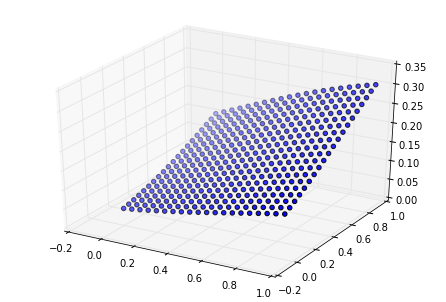

In [177]:
fig = pl.figure()
ax = Axes3D(fig)

ax.scatter(a, b, c)

pl.show()

十分再現できていることが分かる。

②ゲーム理論で用いられるTit for Tatを再現してみる。二人のプレーヤーが互いにRNNで相手の行動を予測し、相手の行動に対してTit for Tatに基づいた行動を選択する。

In [207]:
from nn import RNN

最初の行動はRNNで指定できないので、所与となる。この初期値と裏切りに対する感応度で収束の仕方が決まる。

協調を1、裏切りを0としている。RNNの予測値は整数値でないが、p=（RNNの出力値）で次回に協調を行う。

例１：1期目に、プレーヤー１が協力、プレーヤー２が裏切り。

In [220]:
nn1 = RNN()
nn1.set_network()
nn2 = RNN()
nn2.set_network()

idata1 = [[1, 0]]
idata2 = [[0, 1]]
sdata1 = [[0]]
sdata2 = [[1]]

for t in range(10):
    
    for i in range(10):
        nn1.main2(idata1, sdata2, 0.9)
        nn2.main2(idata2, sdata1, 0.9)
    
    idata1.append([sdata1[-1][0], sdata2[-1][0]])
    idata2.append([idata1[-1][1], idata1[-1][0]])
                   
    n1r = nn1.realize(idata1)
    n2r = nn2.realize(idata1)
    sdata1.append([np.random.choice([1, 0], p=[n1r, 1-n1r])])
    
    sdata2.append([np.random.choice([1, 0], p=[n2r, 1-n2r])])
        
idata.append([sdata1[-1][0], sdata2[-1][0]])
print nn1.realize(idata1), nn2.realize(idata2), idata1

0.152244590605 0.139060261711 [[1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 0]]


下の図より、最初は交互に相手にしっぺ返しをしているが、やがて両者が裏切り合うこと状態に収束する。

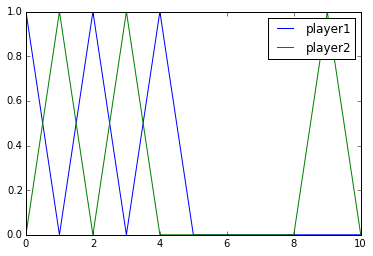

In [221]:
p1 = []
p2 = []
for i in range(len(idata1)):
    p1.append(idata1[i][0])
for i in range(len(idata2)):
    p2.append(idata2[i][0])
p1 = plt.plot(p1, label="player1")
p2 = plt.plot(p2, label="player2")
plt.legend()

例２：1期目に、プレーヤー１が協力、プレーヤー２が協力。ただし、プレーヤー２は相手の裏切りをかなり警戒している。

警戒を表すためにp=（RNNの出力値 - 0.2）とする。p<0の場合はp=0に直す。

In [222]:
nn1 = RNN()
nn1.set_network()
nn2 = RNN()
nn2.set_network()

idata1 = [[1, 1]]
idata2 = [[1, 1]]
sdata1 = [[1]]
sdata2 = [[1]]

for t in range(10):
    
    for i in range(10):
        nn1.main2(idata1, sdata2, 0.9)
        nn2.main2(idata2, sdata1, 0.9)
    
    idata1.append([sdata1[-1][0], sdata2[-1][0]])
    idata2.append([idata1[-1][1], idata1[-1][0]])
                   
    n1r = nn1.realize(idata1)
    n2r = nn2.realize(idata1)
    
    prob1 = n1r 
    prob2 = n2r - 0.3
    
    if prob2 < 0:
        prob2 = 0
    
    sdata1.append([np.random.choice([1, 0], p=[prob1, 1-prob1])])
    
    sdata2.append([np.random.choice([1, 0], p=[prob2, 1-prob2])])
        
idata.append([sdata1[-1][0], sdata2[-1][0]])
print nn1.realize(idata1), nn2.realize(idata2), idata1

0.560369703273 0.401902474768 [[1, 1], [1, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 0], [0, 1], [0, 0], [0, 0]]


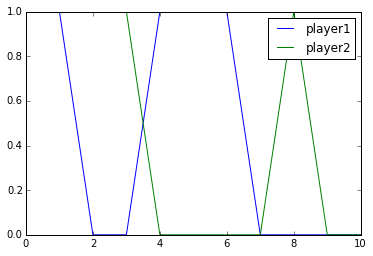

In [223]:
p1 = []
p2 = []
for i in range(len(idata1)):
    p1.append(idata1[i][0])
for i in range(len(idata2)):
    p2.append(idata2[i][0])
p1 = plt.plot(p1, label="player1")
p2 = plt.plot(p2, label="player2")
plt.legend()

例３：次に相手の行動を完全には観測できない場合を考える。t期の相手の行動をt+1期にノイズが加わって知る。例えば、1期目に相手が協調したことを、確率90%で2期目に正しく知れるが、10%で裏切りと誤って伝わる場合である。

ノイズは20%の確率で加わるものとする。その他の条件は例1と同じにした。

In [225]:
nn1 = RNN()
nn1.set_network()
nn2 = RNN()
nn2.set_network()

idata1 = [[1, 0]]
idata2 = [[0, 1]]
sdata1 = [[0]]
sdata2 = [[1]]

for t in range(10):
    
    for i in range(10):
        nn1.main2(idata1, sdata2, 0.9)
        nn2.main2(idata2, sdata1, 0.9)
    
    idata1.append([sdata1[-1][0], np.random.choice([sdata2[-1][0], 1-sdata2[-1][0]], p=[0.8, 0.2])])
    idata2.append([sdata2[-1][0], np.random.choice([sdata1[-1][0], 1-sdata1[-1][0]], p=[0.8, 0.2])])
                   
    n1r = nn1.realize(idata1)
    n2r = nn2.realize(idata1)
    
    prob1 = n1r 
    prob2 = n2r 
    
    sdata1.append([np.random.choice([1, 0], p=[prob1, 1-prob1])])
    
    sdata2.append([np.random.choice([1, 0], p=[prob2, 1-prob2])])
        
idata.append([sdata1[-1][0], sdata2[-1][0]])
print nn1.realize(idata1), nn2.realize(idata2), idata1

 0.40175812889 0.428937655967 [[1, 0], [0, 1], [0, 0], [1, 0], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 0], [0, 1]]


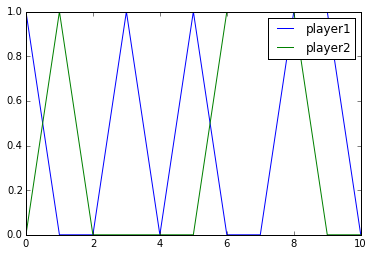

In [226]:
p1 = []
p2 = []
for i in range(len(idata1)):
    p1.append(idata1[i][0])
for i in range(len(idata2)):
    p2.append(idata2[i][0])
p1 = plt.plot(p1, label="player1")
p2 = plt.plot(p2, label="player2")
plt.legend()

今回はゲーム理論の実験の詳細まで考えず、RNNを使うこと自体が目的だったので、回数も少なくした。特に発見を得ることは回数の少なさや問題設定の甘さからできなかったが、ゲームのエージェントにNNを実装する実験はすでに幾つかあるので、今回のレポートを元に引き続き研究に取り組みたい。